<a href="https://colab.research.google.com/github/Gelsa45/Fraud_detection_in_Accounting/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

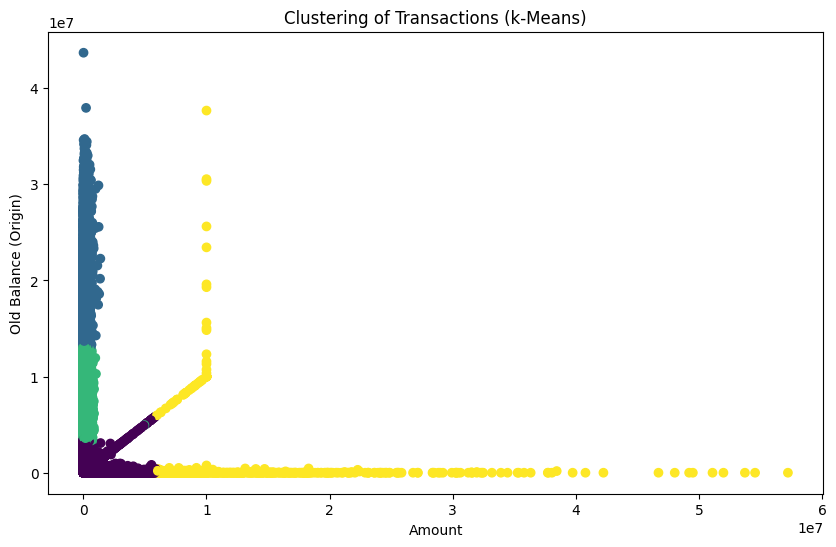

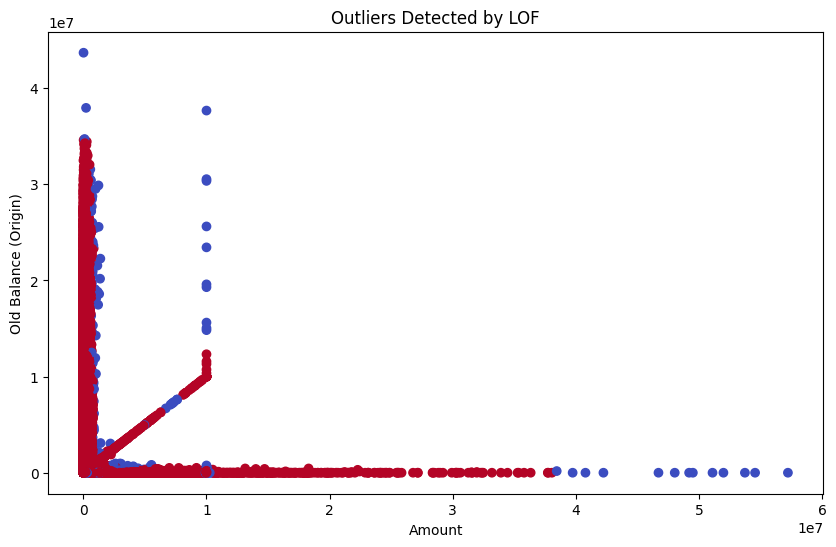

## Fraud Detection Report

**Missing Values:**
```
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
```

**Cluster Distribution:**
```
 Cluster
0    587393
2     38949
1      8951
3       969
Name: count, dtype: int64
```

**Outlier Distribution:**
```
 Outlier
 1    617032
-1     19230
Name: count, dtype: int64
```

**Confusion Matrix:**
```
 [[586631   8951  38947    912]
 [   762      0      2     57]
 [     0      0      0      0]
 [     0      0      0      0]]

```




In [3]:
# prompt: also generate a report for this

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
import io

# Function to generate a report from the provided code output
def generate_report(output):
  report = io.StringIO()

  # Extract relevant information from the output
  # (You can customize this part based on your specific needs)
  missing_values = output.split("Missing values in each column:\n")[1].split("\nCluster")[0]
  cluster_distribution = output.split("Cluster distribution:\n")[1].split("\nOutliers")[0]
  outlier_distribution = output.split("Outliers detected:\n")[1].split("\nConfusion")[0]
  try:
    confusion_matrix_output = output.split("Confusion Matrix:\n")[1]
  except IndexError:
    confusion_matrix_output = "Confusion matrix not available (isFraud column might be missing or have NaN values)."

  report.write("## Fraud Detection Report\n\n")
  report.write("**Missing Values:**\n")
  report.write(f"```\n{missing_values}\n```\n\n")

  report.write("**Cluster Distribution:**\n")
  report.write(f"```\n{cluster_distribution}\n```\n\n")

  report.write("**Outlier Distribution:**\n")
  report.write(f"```\n{outlier_distribution}\n```\n\n")

  report.write("**Confusion Matrix:**\n")
  report.write(f"```\n{confusion_matrix_output}\n```\n\n")

  return report.getvalue()


# Example usage:
# Assuming you have a variable 'output' that contains the string output of the code execution
# output = run_code_and_capture_output(...)

# Generate and print the report
# report = generate_report(output)
# print(report)

# Example code to run the code and capture the output
def run_code_and_capture_output():
  # Import necessary libraries
  # ...

  # Load the dataset
  data = pd.read_csv('fraud_0.1origbase.csv')  # Replace with your dataset

  # Step 1: Data Preprocessing
  # Check for missing values
  print("Missing values in each column:\n", data.isnull().sum())

  # Selecting relevant features for clustering and outlier detection
  features = data[['amount', 'oldbalanceOrg', 'newbalanceOrig']]

  # Step 2: Standardize the features
  scaler = StandardScaler()
  scaled_features = scaler.fit_transform(features)

  # Step 3: Apply k-Means clustering (k=4 as per the paper)
  kmeans = KMeans(n_clusters=4, random_state=0)
  kmeans.fit(scaled_features)

  # Add cluster labels to the dataset
  data['Cluster'] = kmeans.labels_

  # Step 4: Visualize the clusters
  plt.figure(figsize=(10, 6))
  plt.scatter(data['amount'], data['oldbalanceOrg'], c=data['Cluster'], cmap='viridis')
  plt.xlabel('Amount')
  plt.ylabel('Old Balance (Origin)')
  plt.title('Clustering of Transactions (k-Means)')
  plt.show()

  # Step 5: Outlier Detection with LOF
  lof = LocalOutlierFactor(n_neighbors=20)
  outliers = lof.fit_predict(scaled_features)

  # Add outliers to the dataset (-1 indicates outliers)
  data['Outlier'] = outliers

  # Visualize outliers vs non-outliers
  plt.figure(figsize=(10, 6))
  plt.scatter(data['amount'], data['oldbalanceOrg'], c=data['Outlier'], cmap='coolwarm')
  plt.xlabel('Amount')
  plt.ylabel('Old Balance (Origin)')
  plt.title('Outliers Detected by LOF')
  plt.show()

  # Step 6: Analyze the Results
  # Show the clusters and outliers detected
  print("Cluster distribution:\n", data['Cluster'].value_counts())
  print("Outliers detected:\n", data['Outlier'].value_counts())

  # Save the results for further analysis
  data.to_csv('fraud_detection_results.csv', index=False)

  # Optional: Evaluate the Clustering
  # Compare predicted clusters with actual fraud labels (if available)
  if 'isFraud' in data.columns:
    # Drop rows with NaN values in 'isFraud' column before calculating confusion matrix
    data_cleaned = data.dropna(subset=['isFraud'])
    cm = confusion_matrix(data_cleaned['isFraud'], data_cleaned['Cluster'])
    print("Confusion Matrix:\n", cm)


# Capture output in a string variable
output = io.StringIO()
import sys
old_stdout = sys.stdout
sys.stdout = output
try:
  run_code_and_capture_output()
finally:
  sys.stdout = old_stdout

# Generate report
report = generate_report(output.getvalue())
print(report)


Missing values in each column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


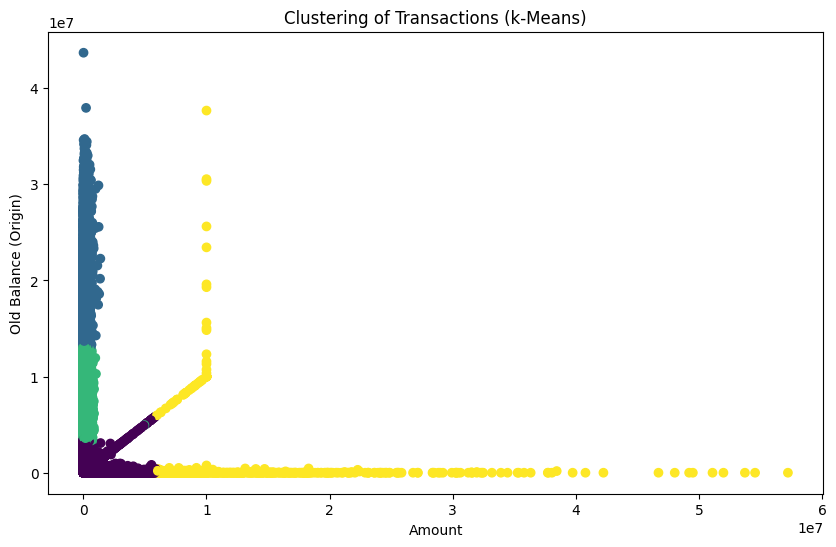

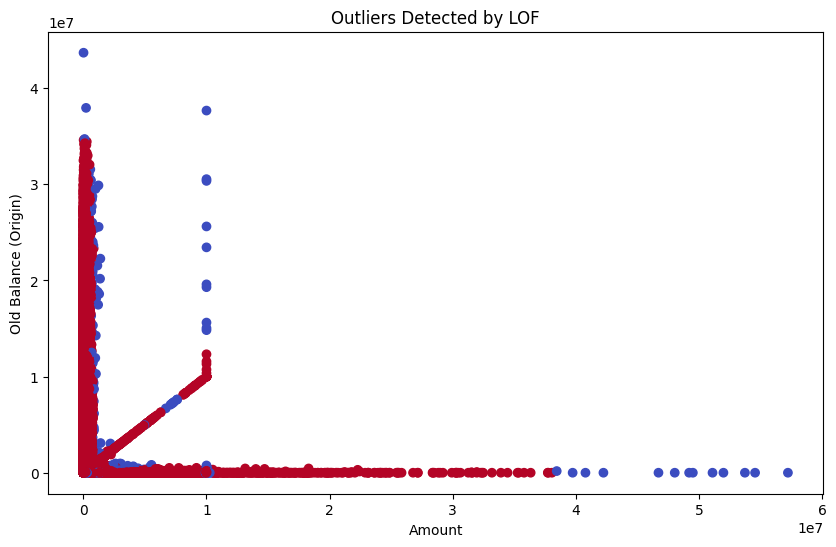

Cluster distribution:
 Cluster
0    587393
2     38949
1      8951
3       969
Name: count, dtype: int64
Outliers detected:
 Outlier
 1    617032
-1     19230
Name: count, dtype: int64
Confusion Matrix:
 [[586631   8951  38947    912]
 [   762      0      2     57]
 [     0      0      0      0]
 [     0      0      0      0]]


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix

# Load the dataset
data = pd.read_csv('fraud_0.1origbase.csv')  # Replace with your dataset

# Step 1: Data Preprocessing
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Selecting relevant features for clustering and outlier detection
features = data[['amount', 'oldbalanceOrg', 'newbalanceOrig']]

# Step 2: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply k-Means clustering (k=4 as per the paper)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_features)

# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['amount'], data['oldbalanceOrg'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Amount')
plt.ylabel('Old Balance (Origin)')
plt.title('Clustering of Transactions (k-Means)')
plt.show()

# Step 5: Outlier Detection with LOF
lof = LocalOutlierFactor(n_neighbors=20)
outliers = lof.fit_predict(scaled_features)

# Add outliers to the dataset (-1 indicates outliers)
data['Outlier'] = outliers

# Visualize outliers vs non-outliers
plt.figure(figsize=(10, 6))
plt.scatter(data['amount'], data['oldbalanceOrg'], c=data['Outlier'], cmap='coolwarm')
plt.xlabel('Amount')
plt.ylabel('Old Balance (Origin)')
plt.title('Outliers Detected by LOF')
plt.show()

# Step 6: Analyze the Results
# Show the clusters and outliers detected
print("Cluster distribution:\n", data['Cluster'].value_counts())
print("Outliers detected:\n", data['Outlier'].value_counts())

# Save the results for further analysis
data.to_csv('fraud_detection_results.csv', index=False)

# Optional: Evaluate the Clustering
# Compare predicted clusters with actual fraud labels (if available)
if 'isFraud' in data.columns:
    # Drop rows with NaN values in 'isFraud' column before calculating confusion matrix
    data_cleaned = data.dropna(subset=['isFraud'])
    cm = confusion_matrix(data_cleaned['isFraud'], data_cleaned['Cluster'])
    print("Confusion Matrix:\n", cm)